In [6]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re


In [7]:
# Load data
df = pd.read_csv('../data/raw/complaints.csv')

C:\Users\USED\AppData\Local\Temp\ipykernel_17468\2159211676.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/complaints.csv')


In [8]:
# Basic info
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [9]:
# 2. Clean column names
df.columns = df.columns.str.strip()

In [10]:
# Remove duplicates
df = df.drop_duplicates()

In [11]:
print(df.columns)


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [12]:
# Handle missing values
df = df.dropna(subset=['Consumer complaint narrative'])


In [13]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_text'] = df['Consumer complaint narrative'].apply(clean_text)

In [14]:
# Tokenization & stopword removal (example)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokens'] = df['cleaned_text'].apply(lambda x: [word for word in x.split() if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Basic stats
df['text_length'] = df['cleaned_text'].apply(len)
print(df['text_length'].describe())

count    2.980756e+06
mean     9.615647e+02
std      1.249008e+03
min      4.000000e+00
25%      3.210000e+02
50%      6.360000e+02
75%      1.142000e+03
max      3.477000e+04
Name: text_length, dtype: float64


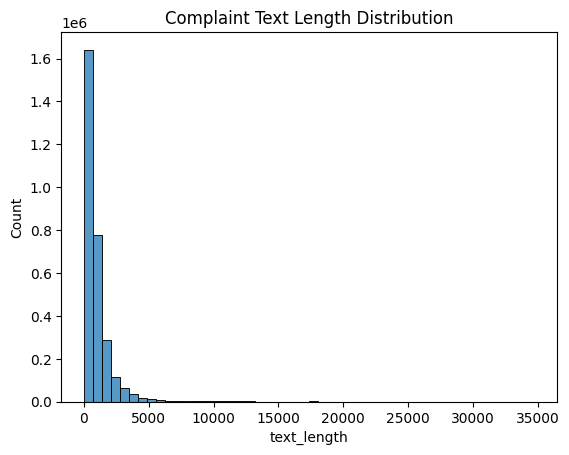

In [16]:
# Visualize complaint length distribution
sns.histplot(df['text_length'], bins=50)
plt.title('Complaint Text Length Distribution')
plt.show()

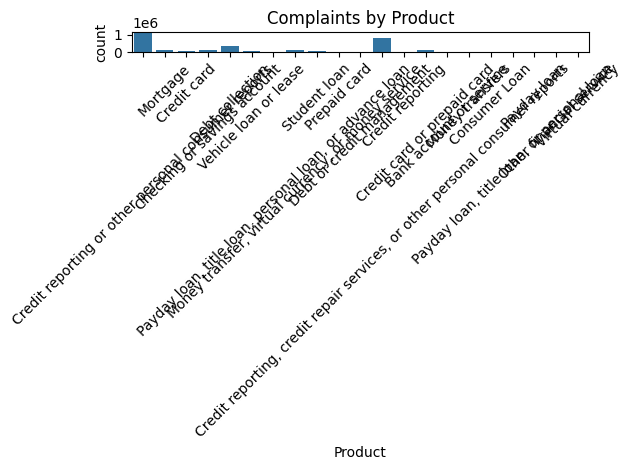

In [17]:
# Visualize complaint categories count
sns.countplot(data=df, x='Product')
plt.xticks(rotation=45)
plt.title('Complaints by Product')
plt.tight_layout()
plt.show()


In [18]:
sample_text = ' '.join(df['cleaned_text'].sample(1000, random_state=42))
wordcloud = WordCloud(width=800, height=400).generate(sample_text)


In [19]:
product_filter = df[df['Product'] == 'Credit reporting']
text = ' '.join(product_filter['cleaned_text'].dropna().sample(1000, random_state=42))
wordcloud = WordCloud(width=800, height=400).generate(text)


In [20]:
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=300,
    collocations=False
).generate(sample_text)


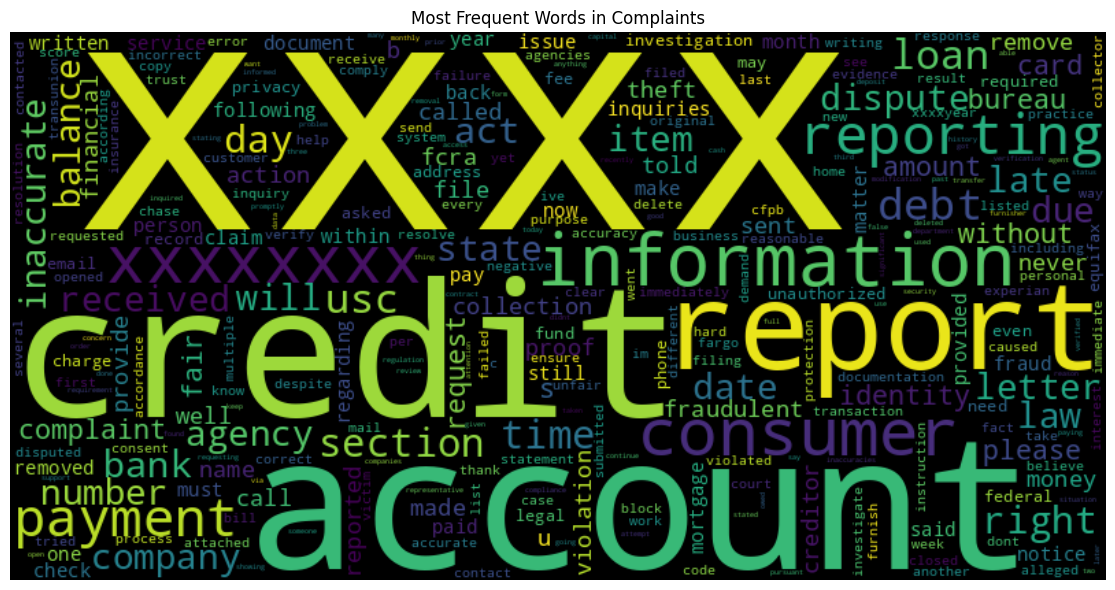

In [21]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Complaints')
plt.tight_layout()
plt.show()


In [22]:
# Save cleaned data
df.to_csv('../data/processed/cleaned_complaints.csv', index=False)

C:\Users\USED\AppData\Local\Temp\ipykernel_17468\3912112943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


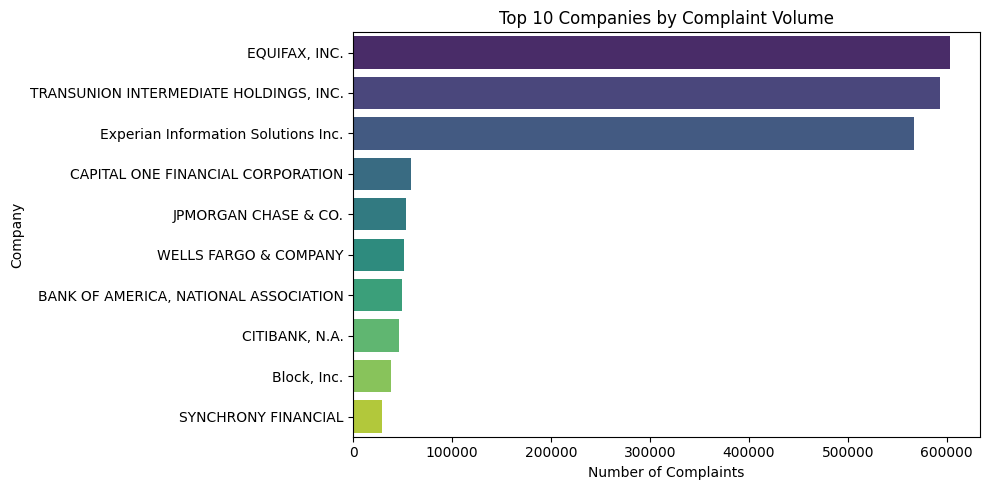

In [23]:
# 7. Complaints by Company
# -------------------------------
top_companies = df['Company'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title("Top 10 Companies by Complaint Volume")
plt.xlabel("Number of Complaints")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

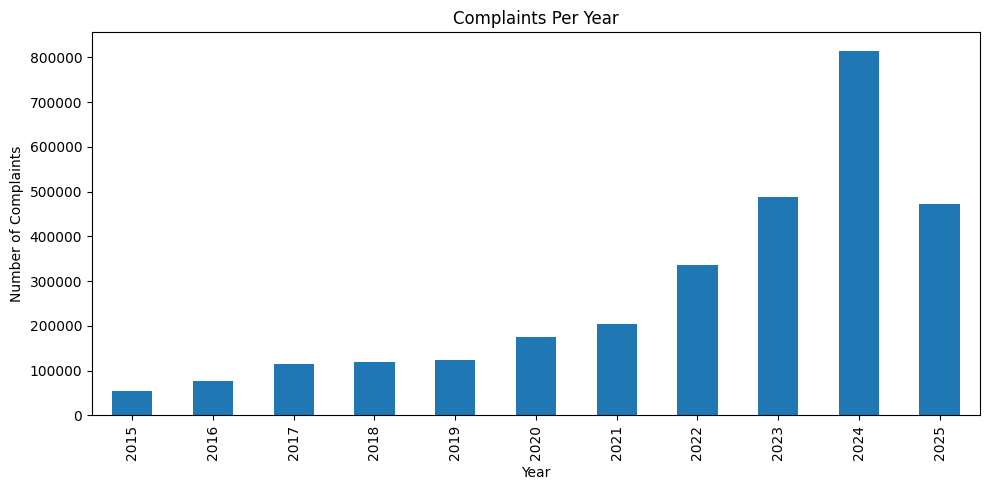

In [24]:
# 6. Complaints Over Time
# -------------------------------
df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
df['Year'] = df['Date received'].dt.year

plt.figure(figsize=(10, 5))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Complaints Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()

In [25]:
# Replace missing values with empty strings
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')


In [26]:
# Create a new column for word count
df['WordCount'] = df['Consumer complaint narrative'].apply(lambda x: len(x.split()))


In [27]:
print(df['WordCount'].describe())


count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: WordCount, dtype: float64


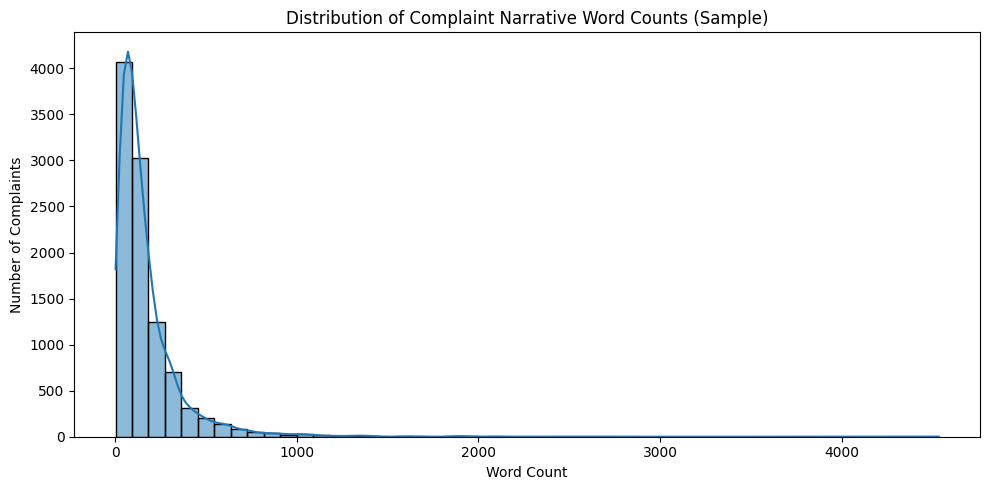

In [28]:

# Use a 10,000 row sample to avoid memory errors
sample = df['WordCount'].sample(10000, random_state=42)

plt.figure(figsize=(10, 5))
sns.histplot(sample, bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Word Counts (Sample)")
plt.xlabel("Word Count")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()


In [29]:
df.columns = df.columns.str.strip()


In [30]:
# Total complaints
total = len(df)

# Complaints with narratives (non-null and non-empty after strip)
with_narrative = df['Consumer complaint narrative'].dropna().apply(str.strip).astype(bool).sum()

# Complaints without narratives
without_narrative = total - with_narrative

print(f"🧾 Total complaints: {total}")
print(f"✅ Complaints WITH narrative: {with_narrative}")
print(f"❌ Complaints WITHOUT narrative: {without_narrative}")


🧾 Total complaints: 2980756
✅ Complaints WITH narrative: 2980756
❌ Complaints WITHOUT narrative: 0


In [31]:
# 3. Standardize product column for easier matching
df['Product'] = df['Product'].str.strip()

In [32]:
# 4. Define list of required products
target_products = [
    'Credit card', 
    'Personal loan', 
    'Buy Now, Pay Later (BNPL)', 
    'Savings account', 
    'Money transfers'
]

In [33]:
# 5. Filter for only those products
df_filtered = df[df['Product'].isin(target_products)]

In [34]:
# 6. Drop rows without a consumer complaint narrative
df_filtered['Consumer complaint narrative'] = df_filtered['Consumer complaint narrative'].fillna('').str.strip()
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'] != '']

C:\Users\USED\AppData\Local\Temp\ipykernel_17468\2363435793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Consumer complaint narrative'] = df_filtered['Consumer complaint narrative'].fillna('').str.strip()


In [35]:
# 7. Drop duplicate narratives
df_filtered = df_filtered.drop_duplicates(subset='Consumer complaint narrative')

In [36]:
# 8. Select relevant columns
df_filtered = df_filtered[[
    'Consumer complaint narrative', 
    'Product', 
    'Issue', 
    'Company', 
    'Date received', 
    'State'
]]

In [37]:
# 9. Reset index and save
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.to_csv('../data/processed/filtered_complaints.csv', index=False)

In [38]:
print(f"✅ Filtered dataset saved: {df_filtered.shape[0]} complaints retained.")

✅ Filtered dataset saved: 74656 complaints retained.


In [39]:
# Remove rows with empty or missing narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'] != '']

In [40]:
print(f"✅ Non-empty complaints retained: {df.shape[0]}")

✅ Non-empty complaints retained: 2980756


In [41]:
# Make sure column is stripped and non-null
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('').str.strip()

# Convert to lowercase
df['cleaned_text'] = df['Consumer complaint narrative'].str.lower()


In [42]:
import re

# Define boilerplate phrases to remove (add more as needed)
BOILERPLATE_PHRASES = [
    r"i am writing to file a complaint",
    r"i am writing to complain",
    r"this is regarding",
    r"to whom it may concern",
    r"i would like to report",
    r"dear sirs?",
    r"hello[,]?",
]

def clean_text_advanced(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)                    # Remove digits
    text = re.sub(r'[^\w\s]', '', text)                # Remove punctuation
    for phrase in BOILERPLATE_PHRASES:
        text = re.sub(phrase, '', text)
    text = re.sub(r'\s+', ' ', text)                   # Normalize whitespace
    return text.strip()


In [43]:
df['cleaned_text'] = df['Consumer complaint narrative'].fillna('').apply(clean_text_advanced)


In [44]:
df.to_csv('../data/processed/cleaned_complaints.csv', index=False)
print(f"✅ Cleaned dataset saved: {df.shape[0]} rows")


✅ Cleaned dataset saved: 2980756 rows
